In [1]:
 import pandas as pd

# Load dataset
df = pd.read_csv("city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df = df.sort_values('Date')              # Sort by Date
print(df.head())


            City       Date   PM2.5    PM10     NO    NO2     NOx    NH3  \
0      Ahmedabad 2015-01-01     NaN     NaN   0.92  18.22   17.15    NaN   
7834     Chennai 2015-01-01     NaN     NaN  16.30  15.39   22.68   4.59   
10229      Delhi 2015-01-01  313.22  607.98  69.16  36.39  110.59  33.85   
19846    Lucknow 2015-01-01     NaN     NaN   2.11  13.46    4.57    NaN   
21855     Mumbai 2015-01-01     NaN     NaN    NaN    NaN   27.38    NaN   

          CO     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0       0.92   27.64  133.36     0.00     0.02    0.00    NaN        NaN  
7834    1.17    9.20   11.35     0.17      NaN     NaN    NaN        NaN  
10229  15.20    9.25   41.68    14.36    24.86    9.84  472.0     Severe  
19846  12.15  169.57   25.92     1.35     3.93     NaN    NaN        NaN  
21855   0.00     NaN     NaN     0.00     0.00    0.00    NaN        NaN  


In [2]:
# View structure and summary
print(df.info())
print(df.describe())
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), float

In [3]:
# Select relevant columns: Date, AQI, and pollutants
pollutants = ['PM2.5', 'PM10', 'CO']
df_clean = df[['Date', 'AQI'] + pollutants].dropna()

print(df_clean.head())


            Date    AQI   PM2.5    PM10     CO
10229 2015-01-01  472.0  313.22  607.98  15.20
10230 2015-01-02  454.0  186.18  269.55   9.54
10231 2015-01-03  143.0   87.18  131.90  10.61
10232 2015-01-04  319.0  151.84  241.84  11.54
10233 2015-01-05  325.0  146.60  219.13   9.20


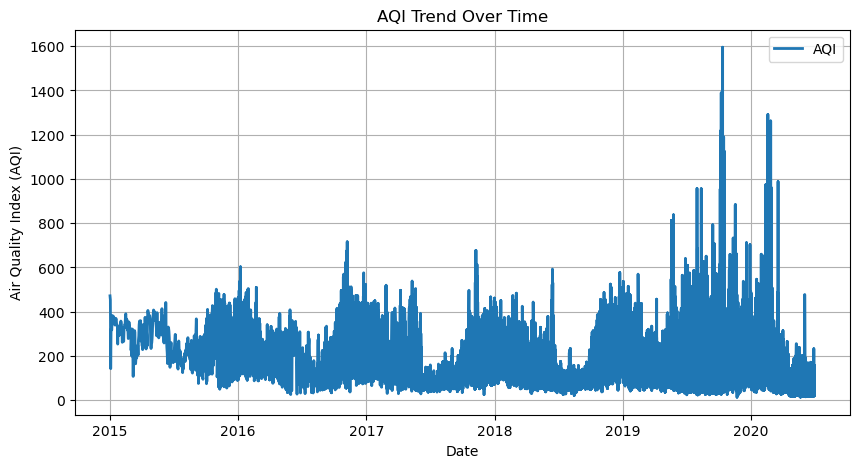

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_clean['Date'], df_clean['AQI'], label='AQI', linewidth=2)
plt.title('AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Air Quality Index (AQI)')
plt.legend()
plt.grid(True)
plt.show()


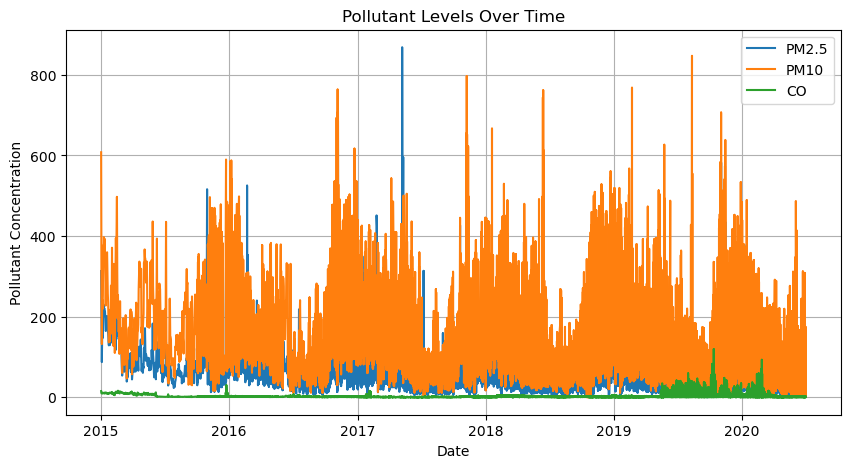

In [5]:
plt.figure(figsize=(10,5))
for pollutant in pollutants:
    plt.plot(df_clean['Date'], df_clean[pollutant], label=pollutant)
plt.title('Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.legend()
plt.grid(True)
plt.show()


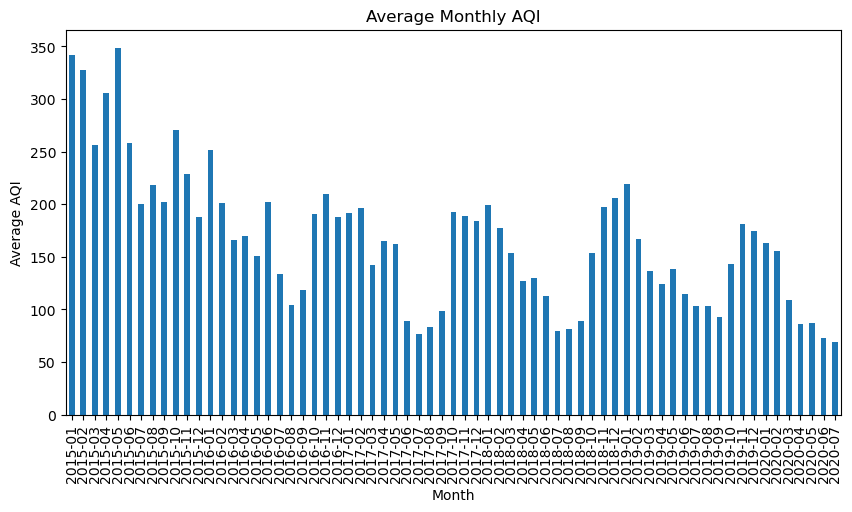

In [6]:
df_clean['Month'] = df_clean['Date'].dt.to_period('M')
monthly_aqi = df_clean.groupby('Month')['AQI'].mean()

monthly_aqi.plot(kind='bar', figsize=(10,5))
plt.title('Average Monthly AQI')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()


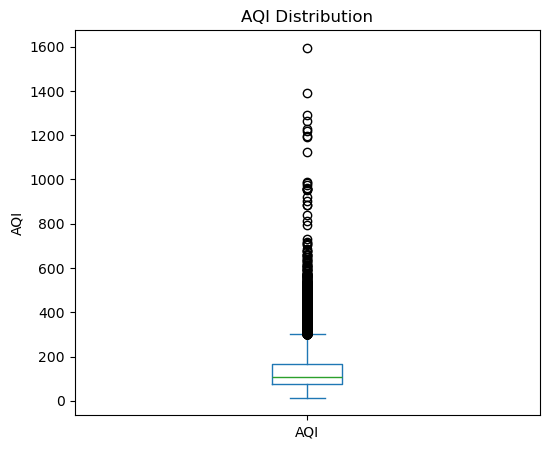

In [7]:
plt.figure(figsize=(6,5))
df_clean['AQI'].plot(kind='box')
plt.title('AQI Distribution')
plt.ylabel('AQI')
plt.show()


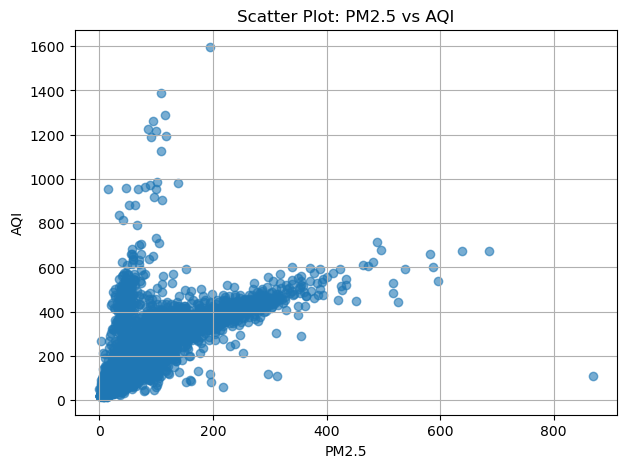

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(df_clean['PM2.5'], df_clean['AQI'], alpha=0.6)
plt.title('Scatter Plot: PM2.5 vs AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.grid(True)
plt.show()
